# Computational Physics 2 - Project 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from math import factorial
from matplotlib.animation import FuncAnimation
import scipy.integrate as integrate
%matplotlib inline

## 1 Stationary (an)harmonic Oscillator

Consider the quantum harmonic oscillator,

\begin{equation}
    \frac{1}{2}(- \partial_u^2 + u^2)v(u) = \epsilon v(u)
\end{equation}

with variables $\epsilon$, $v$ and $u$ instead of $\Epsilon$, $\Psi$ and $x$ for dimensionless formulation.

##### 1. Using the so-called ”shooting method” (as discussed), determine the lowest 10 eigenvalues and corresponding normalized eigenstates. (Hint: It is important to start the integration at a value of $u$ where the wavefunction is assumed sufficiently close to zero, yet, too large values of $|u|$ will make the integration numerically difficult due to excessive divergence. Some trial and error, or a sophisticated guess will help.) (20pts)


For this problem, we will carry out a numerical integration defined as follows:

First, we rearrange our formulation:

\begin{equation*}
    \frac{\partial^2 v(u)}{\partial u^2} = (u^2 - 2 \epsilon) v(u)
\end{equation*}

Next, we formulate expressions for $\frac{\partial v(u)}{\partial u}$, $v(u)$ and $u$ in terms of $\Delta u$ which is the step we use for a numerical integration:

\begin{equation*}
    \frac{\partial v(u)_{n+1}}{\partial u} = \frac{\partial v(u)_n}{\partial u} + \frac{\partial^2 v(u)}{\partial u^2} \cdot \Delta u
\end{equation*}

\begin{equation*}
    v(u)_{n+1} = v(u)_n + \frac{\partial v(u)_{n+1}}{\partial u} \cdot \Delta u
\end{equation*}

\begin{equation*}
    u_{n+1} = u_n + \Delta u
\end{equation*}

Finally, we use a loop and initial conditions to determine the wavefunctions.

In [3]:
# function for shooting method
def shooting_method(u0, du, e, de, v0, dv0):
    
    v_final = 1 # any value above 0.5 can be used here

    # copying original e for later use
    old_e = e

    while abs(v_final) > 0.5:

        # setting parameters to zero at every iteration
        u = u0
        v = v0
        dv = dv0

        # for recording and plotting
        v_list = []
        u_list = []
        # assigning initial values
        v_list.append(v)
        u_list.append(u)

        # loop for integration (Implicit Euler method)
        while u < (+4): # length would then be 8
            # implementation of equations shown above
            ddv = (u**2 - 2*e) * v
            dv += (ddv*du)
            v += (dv*du)
            u += du
            u_list.append(u)
            v_list.append(v)
        
        # to stop when v is close to zero
        v_final = v
        # incrementing epsilon
        e += de
    
    # computing area for normalization
    A = 0
    for i in range(len(v_list)):
        dA = (v_list[i]**2) * du
        A += dA 
        
    new_u_list = np.array(u_list)
    # normalization of the wavefunction
    new_v_list = np.array([v_list[j]/np.sqrt(A) for j in range(len(v_list))])

    # condition to avoid the phase problem (for even harmonics)
    even_harmonics = [1, 3, 5, 7, 9]
    for num in even_harmonics:
        if old_e == num:
            new_v_list = -1*new_v_list

    return new_u_list, new_v_list, e

# Initializing variables
initial_u = -4 # initial u
u_step = 0.001 # step
epsilon = 0 # refer to equation (eigenvalue)
depsilon = 0.01 # to change epsilon (shooting method!)
wf = 0  # initial wavefunction
dwf = 1  # derivative at initial wavefunction

# changing epsilon each time to get the next eigenstate
uvalues1, wavefunction1, eigenvalue1 = shooting_method(initial_u, u_step, epsilon, depsilon, wf, dwf)
uvalues2, wavefunction2, eigenvalue2 = shooting_method(initial_u, u_step, 1, depsilon, wf, dwf)
uvalues3, wavefunction3, eigenvalue3 = shooting_method(initial_u, u_step, 2, depsilon, wf, dwf)
uvalues4, wavefunction4, eigenvalue4 = shooting_method(initial_u, u_step, 3, depsilon, wf, dwf)
uvalues5, wavefunction5, eigenvalue5 = shooting_method(initial_u, u_step, 4, depsilon, wf, dwf)
uvalues6, wavefunction6, eigenvalue6 = shooting_method(initial_u, u_step, 5, depsilon, wf, dwf)
uvalues7, wavefunction7, eigenvalue7 = shooting_method(initial_u, u_step, 6, depsilon, wf, dwf)
uvalues8, wavefunction8, eigenvalue8 = shooting_method(initial_u, u_step, 7, depsilon, wf, dwf)
uvalues9, wavefunction9, eigenvalue9 = shooting_method(initial_u, u_step, 8, depsilon, wf, dwf)
uvalues10, wavefunction10, eigenvalue10 = shooting_method(initial_u, u_step, 9, depsilon, wf, dwf)

##### 2. Plot the wavefunction $v(u)$ vs. $u$ for all wavefunctions $v(u)$ obtained, and label them appropriately. Additionally, plot the first few analytically obtained eigenfunctions (Hermite polynomials) to assess your numerical results. (15 pts)

In [4]:
# defining a function for computing analytical wavefunction
def analytic_wf(n, x):
    """Analytic Harmonic oscillator wavefunction"""
    
    Hr = hermite(n)

    N = 1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi))
    
    v = N*Hr(x)*np.exp(-0.5*x**2)
    
    return v

# computing analytic wavefunctions
y1 = analytic_wf(0, uvalues1)
y2 = analytic_wf(1, uvalues2)
y3 = analytic_wf(2, uvalues3)
y4 = analytic_wf(3, uvalues4)
y5 = analytic_wf(4, uvalues5)
y6 = analytic_wf(5, uvalues6)
y7 = analytic_wf(6, uvalues7)
y8 = analytic_wf(7, uvalues8)
y9 = analytic_wf(8, uvalues9)
y10 = analytic_wf(9, uvalues10)

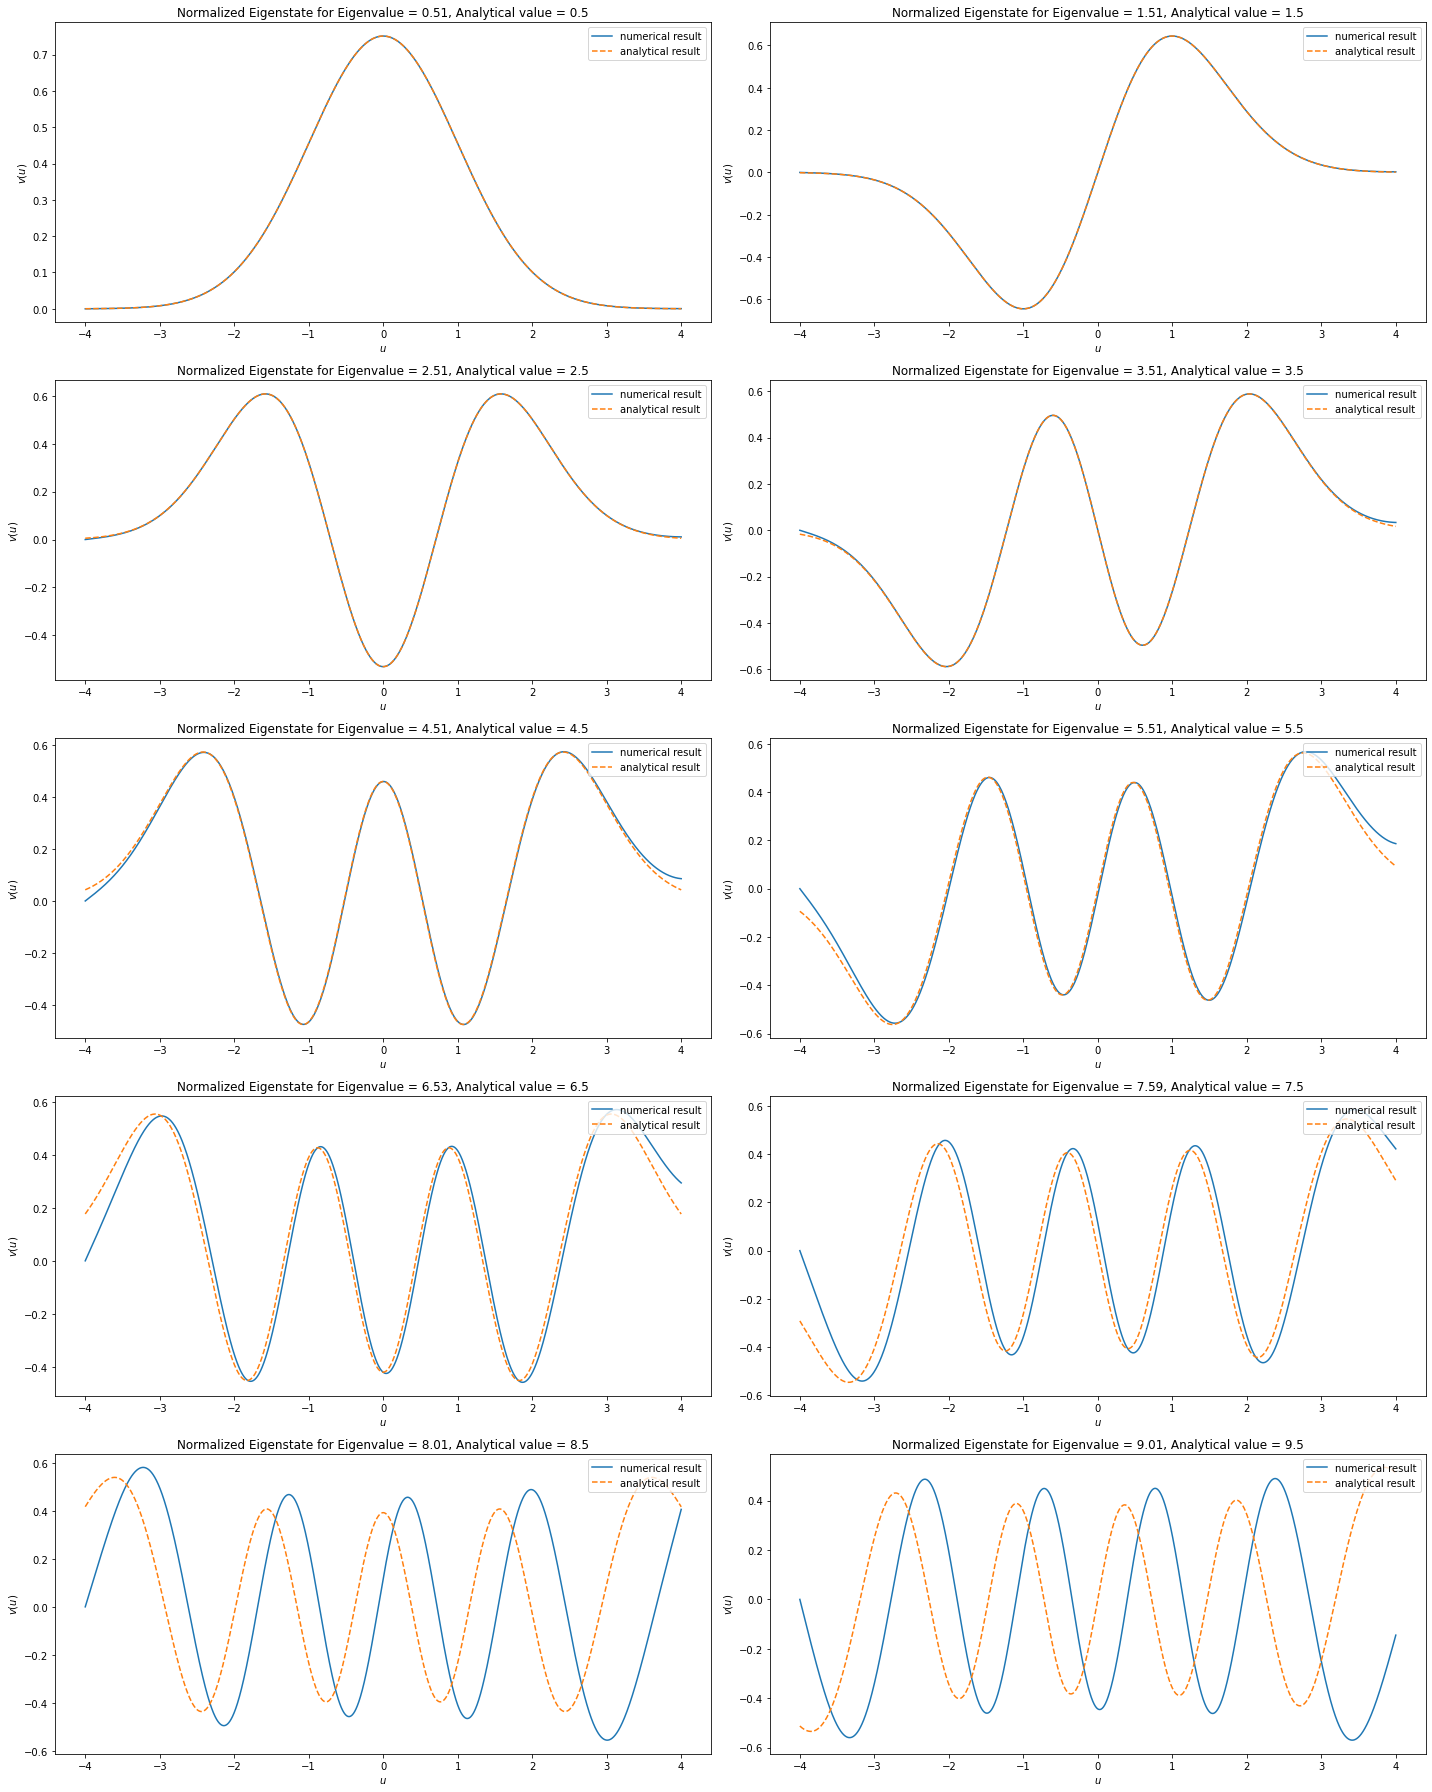

In [5]:
#plotting first 10 lowest eigenstates
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes = axes.flatten()

axes[0].plot(uvalues1, wavefunction1, label = "numerical result")
axes[0].plot(uvalues1, y1, label = "analytical result", linestyle='dashed')
axes[0].legend(loc="upper right")
axes[0].set_xlabel("$u$")
axes[0].set_ylabel("$v(u)$")
axes[0].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue1, 2)}, Analytical value = 0.5')

axes[1].plot(uvalues2, wavefunction2, label = "numerical result")
axes[1].plot(uvalues2, y2, label = "analytical result", linestyle='dashed')
axes[1].legend(loc="upper right")
axes[1].set_xlabel("$u$")
axes[1].set_ylabel("$v(u)$")
axes[1].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue2, 2)}, Analytical value = 1.5')

axes[2].plot(uvalues3, wavefunction3, label = "numerical result")
axes[2].plot(uvalues3, y3, label = "analytical result", linestyle='dashed')
axes[2].legend(loc="upper right")
axes[2].set_xlabel("$u$")
axes[2].set_ylabel("$v(u)$")
axes[2].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue3, 2)}, Analytical value = 2.5')

axes[3].plot(uvalues4, wavefunction4, label = "numerical result")
axes[3].plot(uvalues4, y4, label = "analytical result", linestyle='dashed')
axes[3].legend(loc="upper right")
axes[3].set_xlabel("$u$")
axes[3].set_ylabel("$v(u)$")
axes[3].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue4, 2)}, Analytical value = 3.5')

axes[4].plot(uvalues5, wavefunction5, label = "numerical result")
axes[4].plot(uvalues5, y5, label = "analytical result", linestyle='dashed')
axes[4].legend(loc="upper right")
axes[4].set_xlabel("$u$")
axes[4].set_ylabel("$v(u)$")
axes[4].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue5, 2)}, Analytical value = 4.5')

axes[5].plot(uvalues6, wavefunction6, label = "numerical result")
axes[5].plot(uvalues6, y6, label = "analytical result", linestyle='dashed')
axes[5].legend(loc="upper right")
axes[5].set_xlabel("$u$")
axes[5].set_ylabel("$v(u)$")
axes[5].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue6, 2)}, Analytical value = 5.5')

axes[6].plot(uvalues7, wavefunction7, label = "numerical result")
axes[6].plot(uvalues7, y7, label = "analytical result", linestyle='dashed')
axes[6].legend(loc="upper right")
axes[6].set_xlabel("$u$")
axes[6].set_ylabel("$v(u)$")
axes[6].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue7, 2)}, Analytical value = 6.5')

axes[7].plot(uvalues8, wavefunction8, label = "numerical result")
axes[7].plot(uvalues8, y8, label = "analytical result", linestyle='dashed')
axes[7].legend(loc="upper right")
axes[7].set_xlabel("$u$")
axes[7].set_ylabel("$v(u)$")
axes[7].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue8, 2)}, Analytical value = 7.5')

axes[8].plot(uvalues9, wavefunction9, label = "numerical result")
axes[8].plot(uvalues9, y9, label = "analytical result", linestyle='dashed')
axes[8].legend(loc="upper right")
axes[8].set_xlabel("$u$")
axes[8].set_ylabel("$v(u)$")
axes[8].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue9, 2)}, Analytical value = 8.5')

axes[9].plot(uvalues10, wavefunction10, label = "numerical result")
axes[9].plot(uvalues10, y10, label = "analytical result", linestyle='dashed')
axes[9].legend(loc="upper right")
axes[9].set_xlabel("$u$")
axes[9].set_ylabel("$v(u)$")
axes[9].set_title(f'Normalized Eigenstate for Eigenvalue = {round(eigenvalue10, 2)}, Analytical value = 9.5')

fig.tight_layout()

##### 3. allow for an additional term $\propto$ $\alpha u^4 v(u)$ (a fourth-order potential) on the LHS of Eq. 1, yielding an anharmonic oscillator. For a suitable value of $\alpha$ again obtain the first 10 eigenfunctions and corresponding eigenvalues. Discuss the difference to those obtained from the harmonic oscillator. (15 pts)

Text(0.5, 1.0, 'Normalized Eigenstate for Eigenvalue = 9.01, Analytical value = 1.5')

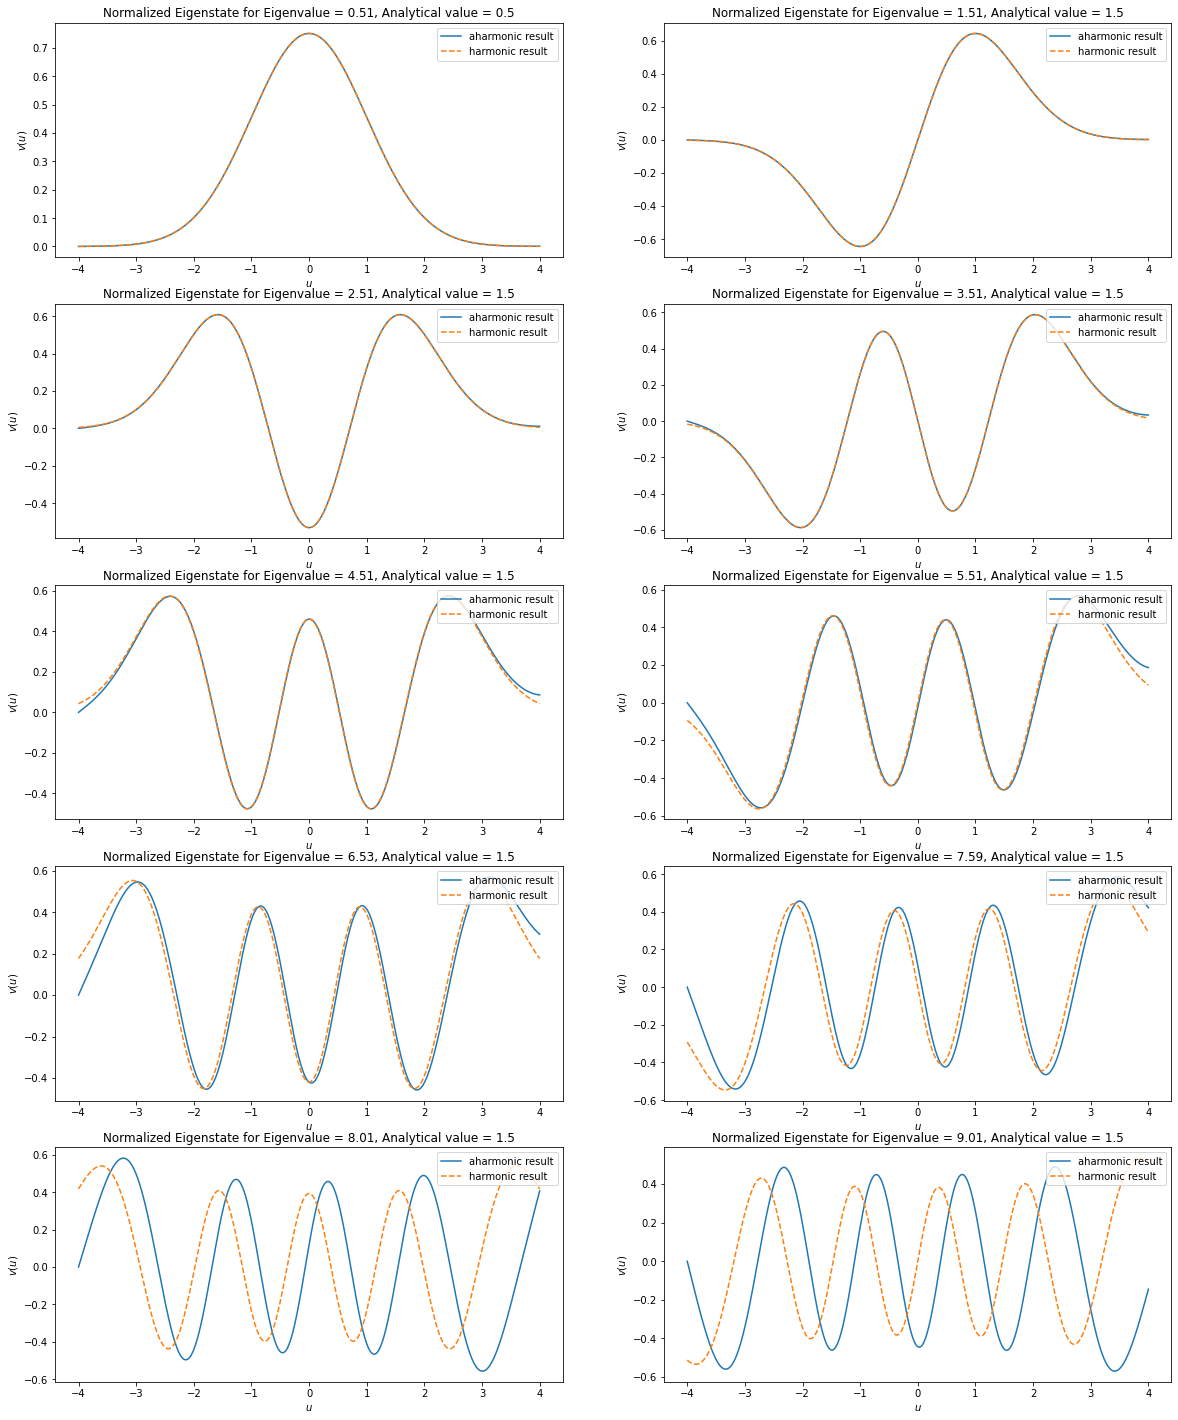

In [22]:
def aharmonic_shooting_method(u0, du, e, de, v0, dv0, alpha):
    
    v_final = 1 # any value above 0.5 can be used here

    # copying original e for later use
    old_e = e

    while abs(v_final) > 0.5:

        # setting parameters to zero at every iteration
        u = u0
        v = v0
        dv = dv0

        # for recording and plotting
        v_list = []
        u_list = []
        # assigning initial values
        v_list.append(v)
        u_list.append(u)

        # loop for integration (Implicit Euler method)
        while u < (+4): # length would then be 8
            # implementation of equations shown above
            ddv = (u**2 + (alpha * u**4) - 2*e) * v
            dv += (ddv*du)
            v += (dv*du)
            u += du
            u_list.append(u)
            v_list.append(v)
        
        # to stop when v is close to zero
        v_final = v
        # incrementing epsilon
        e += de
    
    # computing area for normalization
    A = 0
    for i in range(len(v_list)):
        dA = (v_list[i]**2) * du
        A += dA 
        
    new_u_list = np.array(u_list)
    # normalization of the wavefunction
    new_v_list = np.array([v_list[j]/np.sqrt(A) for j in range(len(v_list))])

    # condition to avoid the phase problem (for even harmonics)
    even_harmonics = [1, 3, 5, 7, 9]
    for num in even_harmonics:
        if old_e == num:
            new_v_list = -1*new_v_list

    return new_u_list, new_v_list, e

alpha = 0.000001

a_uvalue1, a_wavefunction1, a_eigenvalue1 = aharmonic_shooting_method(-4, u_step, epsilon, depsilon, wf, dwf, alpha)
a_uvalue2, a_wavefunction2, a_eigenvalue2 = aharmonic_shooting_method(-4, u_step, 1, depsilon, wf, dwf, alpha)
a_uvalue3, a_wavefunction3, a_eigenvalue3 = aharmonic_shooting_method(-4, u_step, 2, depsilon, wf, dwf, alpha)
a_uvalue4, a_wavefunction4, a_eigenvalue4 = aharmonic_shooting_method(-4, u_step, 3, depsilon, wf, dwf, alpha)
a_uvalue5, a_wavefunction5, a_eigenvalue5 = aharmonic_shooting_method(-4, u_step, 4, depsilon, wf, dwf, alpha)
a_uvalue6, a_wavefunction6, a_eigenvalue6 = aharmonic_shooting_method(-4, u_step, 5, depsilon, wf, dwf, alpha)
a_uvalue7, a_wavefunction7, a_eigenvalue7 = aharmonic_shooting_method(-4, u_step, 6, depsilon, wf, dwf, alpha)
a_uvalue8, a_wavefunction8, a_eigenvalue8 = aharmonic_shooting_method(-4, u_step, 7, depsilon, wf, dwf, alpha)
a_uvalue9, a_wavefunction9, a_eigenvalue9 = aharmonic_shooting_method(-4, u_step, 8, depsilon, wf, dwf, alpha)
a_uvalue10, a_wavefunction10, a_eigenvalue10 = aharmonic_shooting_method(-4, u_step, 9, depsilon, wf, dwf, alpha)

# plotting
# plotting first 10 lowest eigenstates
fig2, axes2 = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes2 = axes2.flatten()

axes2[0].plot(a_uvalue1, a_wavefunction1, label = "aharmonic result")
axes2[0].plot(uvalues1, y1, label = "harmonic result", linestyle='dashed')
axes2[0].legend(loc="upper right")
axes2[0].set_xlabel("$u$")
axes2[0].set_ylabel("$v(u)$")
axes2[0].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue1, 2)}, Analytical value = 0.5')

axes2[1].plot(a_uvalue2, a_wavefunction2, label = "aharmonic result")
axes2[1].plot(uvalues2, y2, label = "harmonic result", linestyle='dashed')
axes2[1].legend(loc="upper right")
axes2[1].set_xlabel("$u$")
axes2[1].set_ylabel("$v(u)$")
axes2[1].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue2, 2)}, Analytical value = 1.5')

axes2[2].plot(a_uvalue3, a_wavefunction3, label = "aharmonic result")
axes2[2].plot(uvalues3, y3, label = "harmonic result", linestyle='dashed')
axes2[2].legend(loc="upper right")
axes2[2].set_xlabel("$u$")
axes2[2].set_ylabel("$v(u)$")
axes2[2].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue3, 2)}, Analytical value = 2.5')

axes2[3].plot(a_uvalue4, a_wavefunction4, label = "aharmonic result")
axes2[3].plot(uvalues4, y4, label = "harmonic result", linestyle='dashed')
axes2[3].legend(loc="upper right")
axes2[3].set_xlabel("$u$")
axes2[3].set_ylabel("$v(u)$")
axes2[3].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue4, 2)}, Analytical value = 3.5')

axes2[4].plot(a_uvalue5, a_wavefunction5, label = "aharmonic result")
axes2[4].plot(uvalues5, y5, label = "harmonic result", linestyle='dashed')
axes2[4].legend(loc="upper right")
axes2[4].set_xlabel("$u$")
axes2[4].set_ylabel("$v(u)$")
axes2[4].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue5, 2)}, Analytical value = 4.5')

axes2[5].plot(a_uvalue6, a_wavefunction6, label = "aharmonic result")
axes2[5].plot(uvalues6, y6, label = "harmonic result", linestyle='dashed')
axes2[5].legend(loc="upper right")
axes2[5].set_xlabel("$u$")
axes2[5].set_ylabel("$v(u)$")
axes2[5].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue6, 2)}, Analytical value = 5.5')

axes2[6].plot(a_uvalue7, a_wavefunction7, label = "aharmonic result")
axes2[6].plot(uvalues7, y7, label = "harmonic result", linestyle='dashed')
axes2[6].legend(loc="upper right")
axes2[6].set_xlabel("$u$")
axes2[6].set_ylabel("$v(u)$")
axes2[6].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue7, 2)}, Analytical value = 6.5')

axes2[7].plot(a_uvalue8, a_wavefunction8, label = "aharmonic result")
axes2[7].plot(uvalues8, y8, label = "harmonic result", linestyle='dashed')
axes2[7].legend(loc="upper right")
axes2[7].set_xlabel("$u$")
axes2[7].set_ylabel("$v(u)$")
axes2[7].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue8, 2)}, Analytical value = 7.5')

axes2[8].plot(a_uvalue9, a_wavefunction9, label = "aharmonic result")
axes2[8].plot(uvalues9, y9, label = "harmonic result", linestyle='dashed')
axes2[8].legend(loc="upper right")
axes2[8].set_xlabel("$u$")
axes2[8].set_ylabel("$v(u)$")
axes2[8].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue9, 2)}, Analytical value = 8.5')

axes2[9].plot(a_uvalue10, a_wavefunction10, label = "aharmonic result")
axes2[9].plot(uvalues10, y10, label = "harmonic result", linestyle='dashed')
axes2[9].legend(loc="upper right")
axes2[9].set_xlabel("$u$")
axes2[9].set_ylabel("$v(u)$")
axes2[9].set_title(f'Normalized Eigenstate for Eigenvalue = {round(a_eigenvalue10, 2)}, Analytical value = 9.5')

## 2 Propagating wavepacket

Consider the Gaussian wavepacket,

\begin{equation*}
    v(u,0) = \left (\frac{1}{\pi} \right) ^\frac{1}{4} e^{\frac{-u^2}{2}}
\end{equation*}

that is, the ground state of the 1D harmonic oscillator.

##### 1. Discretize space and represent $v(u, 0)$ as a discrete function of space.

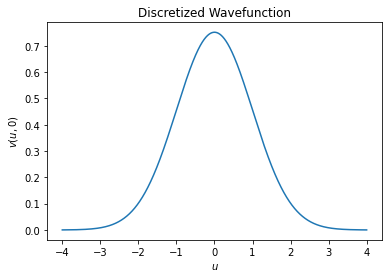

In [7]:
xlim = 4
samples = 100000
u = np.linspace(-xlim, xlim, samples)
v_u = (1/np.pi)**0.25 * np.exp(-u**2/2)
plt.plot(u, v_u)
plt.title("Discretized Wavefunction")
plt.xlabel("$u$")
plt.ylabel("$v(u,0)$")
plt.show()

##### 2. Using an appropriate discrete (fast) Fourier transform, transform $\Psi$ to momentum space and act on it with the free-particle $(V (u) = 0)$ time evolution operator, to obtain $v(u, \Delta t)$ for a small value of $\Delta t$. Repeat for a sufficient number $n$ of timesteps to propagate to $v(u, n \Delta t)$. Plot $v(u, m \Delta t)$ for several values of $m$, check the normalization and compare with the exact results obtained in class.

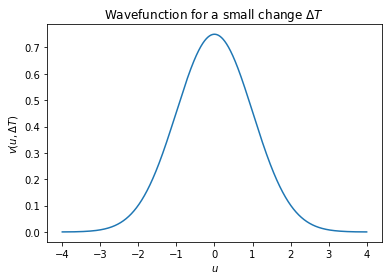

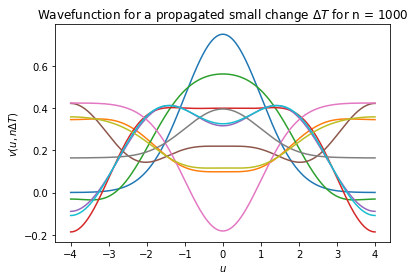

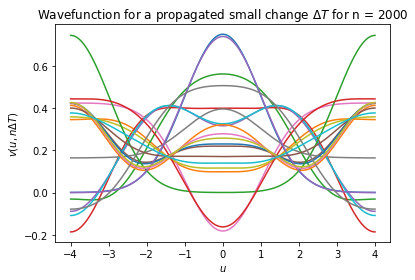

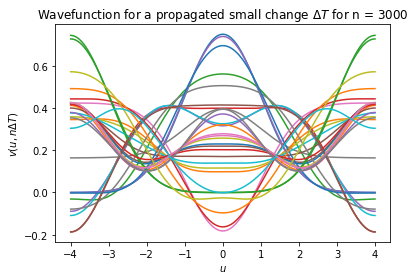

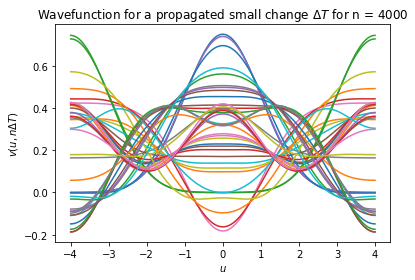

In [8]:
# importing functions
from scipy.fft import fft, ifft, fftfreq

delta_t = 0.001

# transforming to momentum space
Fourier_v_u = fft(v_u)

# acting on it with the free-particle time evolution operator
momentums = fftfreq(len(v_u), 1/samples) * 2*np.pi
P_Fourier_v_u = Fourier_v_u * np.exp(-1j * (momentums**2 / 2) * delta_t)

# inverse fourier transforming it for a small change delta_t
inv_P_Fourier_v_u = np.real(ifft(P_Fourier_v_u))

# plotting the wavefunction for a small change delta_t
plt.plot(u, inv_P_Fourier_v_u)
plt.title("Wavefunction for a small change $\Delta T$")
plt.xlabel("$u$")
plt.ylabel("$v(u,\Delta T)$")
plt.show()

## for doing this process multiple times

# defining a function to help animate
def advance_delta_t(u, spectra, momentums, delta_t, n):
    wavefunctions = []
    for i in range(n):

        if (i%100) == 0 :

            spectra = spectra * np.exp(-1j * (momentums**2 / 2) * (delta_t*i))

            inv_spectra = np.real(ifft(spectra))

            plt.plot(u, inv_spectra)

    plt.title(f'Wavefunction for a propagated small change $\Delta T$ for n = {n}')
    plt.xlabel("$u$")
    plt.ylabel("$v(u, n \Delta T)$")
    plt.show()

advance_delta_t(u, P_Fourier_v_u, momentums, delta_t, 1000)
advance_delta_t(u, P_Fourier_v_u, momentums, delta_t, 2000)
advance_delta_t(u, P_Fourier_v_u, momentums, delta_t, 3000)
advance_delta_t(u, P_Fourier_v_u, momentums, delta_t, 4000)

##### 3. Give the wavepacket an initial momentum $k_0$ by multiplying Eq. 2 by a phase factor $e^{−ik_0 u}$. Introduce a potential barrier $V(u) = V_0$ for suitably chosen $0 < u_1 ≤ u ≤ u_2$ and $V(u) = 0$ otherwise. Allow yourself to modify the constant $V_0$ and discuss the behavior at the interfaces $u = u_1$ and $u = u_2$. (Hint: To incorporate the potential $V(u)$ into your code, it is recommended to apply the potential in position space and the kinetic energy operator in momentum space.)

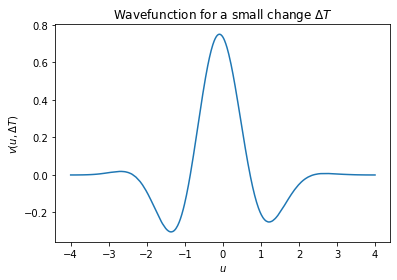

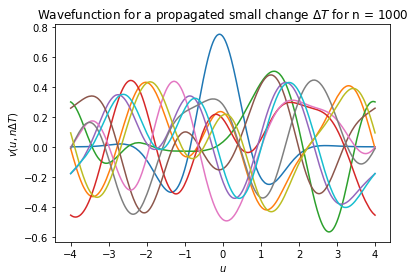

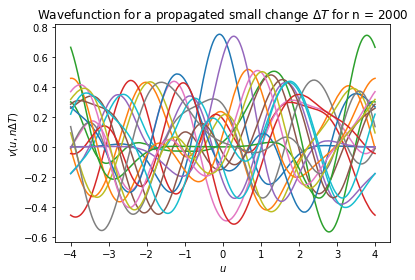

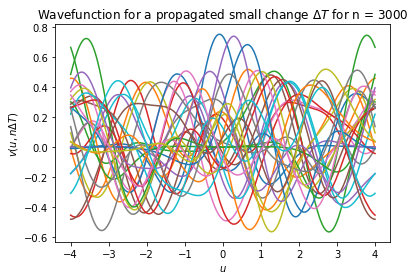

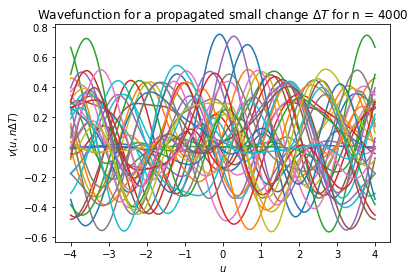

In [18]:
k0 = 2

# giving wavepacket an initial momentum
new_wavepacket = (1/np.pi)**0.25 * np.exp(-u**2/2) * np.exp(-1j * k0 * u)

# introducing a potential barrier
v0 = 2
v = np.zeros(len(u))
u1 = 2
u2 = 3
v[75000:87500] = v0
new_wavepacket_v = new_wavepacket * np.exp(-1j * v * delta_t)

# Fourier transforming as usual
Fourier_wav = fft(new_wavepacket_v)

# acting on it with the free-particle time evolution operator
momentums2 = fftfreq(len(new_wavepacket_v), 1/samples) * 2*np.pi
P_Fourier_wav = Fourier_wav * np.exp(-1j * (momentums2**2 / 2) * delta_t)

# inverse fourier transforming it for a small change delta_t
inv_P_Fourier_wav = np.real(ifft(P_Fourier_wav))

# plotting the wavefunction for a small change delta_t
plt.plot(u, inv_P_Fourier_wav)
plt.title("Wavefunction for a small change $\Delta T$")
plt.xlabel("$u$")
plt.ylabel("$v(u,\Delta T)$")
plt.show()

# advancing in time
advance_delta_t(u, P_Fourier_wav, momentums2, delta_t, 1000)
advance_delta_t(u, P_Fourier_wav, momentums2, delta_t, 2000)
advance_delta_t(u, P_Fourier_wav, momentums2, delta_t, 3000)
advance_delta_t(u, P_Fourier_wav, momentums2, delta_t, 4000)

This should if animated, show the quantum tunnelling effect. However, since I had a number of problems with animating, this was not done.

##### 4. Finally, return to the harmonic oscillator potential $V(u) = au^2$ and allow the wavepacket to propagate within this potential. Compute the position expectation value $u(t) ≡ ⟨v(u, t)| \hat{u}|v(u, t)⟩$ for each timestep and plot $u(t)$ vs $t$. Similarly, obtain the momentum expectation value $k(t) = ⟨\Psi (k, t)| \hat{k}| \Psi(k, t)⟩$ and add it to the plot. Qualitatively discuss your findings in relation to classical expectations.

##### 5. Document your results by appropriate figures or animations (the latter is quite straightforward to do in Python using animation.FuncAnimation and may be most useful).